In [24]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import re
%matplotlib inline

In [25]:
def load_production_data(data_path="./"):
    
    production_train = []
    train_files = sorted(os.listdir(data_path+"/TrainingDataProduction/TrainingDataProduction"))
    train_files.sort(key=lambda f: int(re.sub('\D', '', f)))
    for file in train_files:
        temp = pd.read_csv(data_path+"/TrainingDataProduction/TrainingDataProduction/"+file, sep=";")
        temp["ProcessCycle"] = int(file.split('.')[0])
        production_train.append(temp)

    production_train = pd.concat(production_train)

    production_valid = []
    valid_files = sorted(os.listdir(data_path+"/ValidationDataProduction/ValidationDataProduction"))
    valid_files.sort(key=lambda f: int(re.sub('\D', '', f)))
    for file in valid_files:
        temp = pd.read_csv(data_path+"/ValidationDataProduction/ValidationDataProduction/"+file, sep=";")
        temp["ProcessCycle"] = int(file.split('.')[0])
        production_valid.append(temp)

    production_valid = pd.concat(production_valid)
    
    production_test = []

    test_files = sorted(os.listdir(data_path+"/EvaluationDataProduction/EvaluationDataProduction"))
    test_files.sort(key=lambda f: int(re.sub('\D', '', f)))
    for file in test_files:
        temp = pd.read_csv(data_path+"/EvaluationDataProduction/EvaluationDataProduction/"+file, sep=";")
        temp["ProcessCycle"] = int(file.split('.')[0])
        production_test.append(temp)

    production_test = pd.concat(production_test)
    
    cols_with_no_variance_train = []
    cols_with_no_variance_valid = []

    for col in production_train.columns:
        if len(production_train[col].unique()) == 1:
            cols_with_no_variance_train.append(col)

    for col in production_valid.columns:
        if len(production_valid[col].unique()) == 1:
            cols_with_no_variance_valid.append(col)

    common_cols_with_no_variance = list(set(cols_with_no_variance_train) & set(cols_with_no_variance_valid))

    production_train = production_train.drop(common_cols_with_no_variance, axis = 1)
    production_valid = production_valid.drop(common_cols_with_no_variance, axis = 1)
    production_test = production_test.drop(common_cols_with_no_variance, axis = 1)

    production_train["Split"] = "Train"
    production_valid["Split"] = "Valid"
    production_test["Split"] = "Test"
    
    
    production_train_val_combined = pd.concat([production_train, production_valid]).reset_index(drop=True)
    
    return production_train_val_combined, production_test

In [26]:
df_train, df_test = load_production_data()



In [27]:
train, valid = df_train, df_test

In [28]:
#Erstellen von Dummies, um numerische Werte zu erhalten
split = pd.get_dummies(train['Split'],drop_first=True)

train.drop(["Split"],axis=1,inplace=True)
train = pd.concat([train,split],axis=1)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73721 entries, 0 to 73720
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Timestamp                     73721 non-null  int64
 1   I_xAxisDownPos                73721 non-null  int64
 2   I_xAxisMiddlePos              73721 non-null  int64
 3   I_xAxisUpPos                  73721 non-null  int64
 4   I_xBotInPosDischargPickPlace  73721 non-null  int64
 5   I_xBottelInPos0               73721 non-null  int64
 6   I_xBottelInPos2               73721 non-null  int64
 7   I_xBottelInPos4               73721 non-null  int64
 8   I_xBottelInPos6               73721 non-null  int64
 9   I_xBottelInPos8               73721 non-null  int64
 10  I_xBottleAtGateOne            73721 non-null  int64
 11  I_xBottleFixIsClosed          73721 non-null  int64
 12  I_xBottleFixIsOpen            73721 non-null  int64
 13  I_xCamBottleIsFilled          7

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
#Init von Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(train.drop('Valid',axis=1), 
                                                    train['Valid'], test_size=0.30, 
                                                    random_state=101)

y_train = y_train.values
y_test = y_test.values

In [34]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

print(X_train.shape)
print(X_test.shape)
print(len(y_train[y_train==0]), 'negative samples in the training set')
print(len(y_train[y_train==1]), 'positive samples in the training set')
print(len(y_test[y_test==0]), 'negative samples in the test set')
print(len(y_test[y_test==1]), 'positive samples in the test set')

TypeError: __init__() got an unexpected keyword argument 'ratio'

In [9]:
#Principal Component Analysis für die Dimensionsreduktion
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components = 2)
pca_2d = pca.fit_transform(X_train)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51604 entries, 37326 to 45919
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Timestamp                     51604 non-null  int64
 1   I_xAxisDownPos                51604 non-null  int64
 2   I_xAxisMiddlePos              51604 non-null  int64
 3   I_xAxisUpPos                  51604 non-null  int64
 4   I_xBotInPosDischargPickPlace  51604 non-null  int64
 5   I_xBottelInPos0               51604 non-null  int64
 6   I_xBottelInPos2               51604 non-null  int64
 7   I_xBottelInPos4               51604 non-null  int64
 8   I_xBottelInPos6               51604 non-null  int64
 9   I_xBottelInPos8               51604 non-null  int64
 10  I_xBottleAtGateOne            51604 non-null  int64
 11  I_xBottleFixIsClosed          51604 non-null  int64
 12  I_xBottleFixIsOpen            51604 non-null  int64
 13  I_xCamBottleIsFilled       

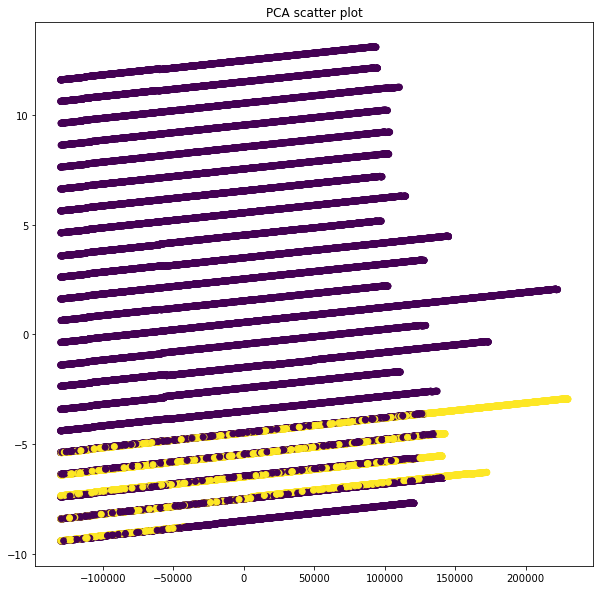

In [10]:
plt.figure(figsize = (10, 10))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = y_train)
plt.title('PCA scatter plot')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
#Erstellen und Fitten des Modells auf Trainingsdaten
logmodel = LogisticRegression(solver="liblinear", max_iter=250)
#logmodel = LogisticRegressionCV(cv= 5, class_weight="balanced")
logmodel.fit(X_train,y_train)

sgdmodel = SGDClassifier(loss="log")
sgdmodel.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

model = Sequential()

model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy', # loss
    optimizer="rmsprop", # learning rule
    #optimizer=Adam(), # learning rule
    metrics=['accuracy'] # show accuracy
)

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                2816      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# Train the linear classifier on the extracted features
model.fit(x=X_train, y=y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 41283 samples, validate on 10321 samples
Epoch 1/20
41283/41283 [==============================] - 1s 23us/step - loss: 1283.5745 - accuracy: 0.7008 - val_loss: 0.6313 - val_accuracy: 0.8227
Epoch 2/20
41283/41283 [==============================] - 1s 16us/step - loss: 2.8429 - accuracy: 0.8072 - val_loss: 0.5167 - val_accuracy: 0.8227
Epoch 3/20
41283/41283 [==============================] - 1s 16us/step - loss: 0.5171 - accuracy: 0.8292 - val_loss: 0.4969 - val_accuracy: 0.8227
Epoch 4/20
41283/41283 [==============================] - 1s 16us/step - loss: 0.5257 - accuracy: 0.8292 - val_loss: 0.4662 - val_accuracy: 0.8227
Epoch 5/20
41283/41283 [==============================] - 1s 15us/step - loss: 0.4799 - accuracy: 0.8292 - val_loss: 0.4664 - val_accuracy: 0.8227
Epoch 6/20
41283/41283 [==============================] - 1s 19us/step - loss: 0.5246 - accuracy: 0.8292 - val_loss: 0.4667 - val_accuracy: 0.8227
Epoch 7/20
41283/41283 [==============================] - 1s 19us

In [41]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation="logistic")
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict_proba(X_test)[:, 1]

In [42]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [15]:
evaluation_auc(logmodel)

NameError: name 'evaluation_auc' is not defined

[[18029   207]
 [ 3814    67]]


              precision    recall  f1-score   support

           0       0.83      0.99      0.90     18236
           1       0.24      0.02      0.03      3881

    accuracy                           0.82     22117
   macro avg       0.53      0.50      0.47     22117
weighted avg       0.72      0.82      0.75     22117



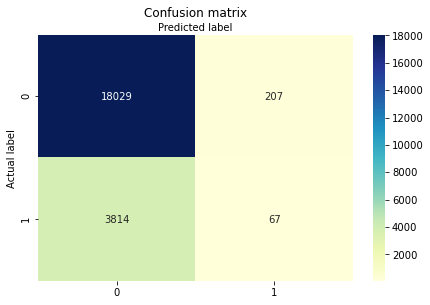

In [19]:
evaluation(logmodel.predict(X_test))

In [16]:
def evaluation(predictions):
    #Auswertung durch Confusion Matrix und dem Built-In Report von Sklearn
    cnf_matrix = metrics.confusion_matrix(y_test,predictions)
    print(cnf_matrix)
    print("\n")
    print(metrics.classification_report(y_test, predictions))

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


In [17]:
def evaluation_auc(model):
    #AUC als Performanceindikator der alle möglichen Thresholds aggregiert. Je höher der AUC, also die Fläche unter der ROC-Kurve ist,
    #desto besser kann eine Klasse bestimmt werden. Jedoch ist ein AUC von 0.5 ein Indiz für eine nicht erfolgreiche Bestimmung der Klassen
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    